<a href="https://colab.research.google.com/github/alsalamahs/MLGitDemo/blob/master/feature_viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Feature Visualization Tutorial**

# Requirements installation

We will install the packages required to run the tutorial. 

In [0]:
!pip install Pillow==4.1.1
!pip install -U image
!pip install opencv-python


from io import BytesIO
from IPython.display import clear_output, Image, display
import numpy as np
import PIL.Image
from __future__ import print_function
import cv2

Requirement already up-to-date: image in /usr/local/lib/python3.6/dist-packages (1.5.27)


We will load PyTorch, our main tool to play with neural networks. 

In [0]:
!pip install torch
!pip install torchvision

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models
import torch.hub

from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag


# Loading Images and PyTorch models


Once, we have loaded all the relevant libraries, we will load the model. We will begin with an scene classification model trained on the Places Dataset with a ResNet-50 architecture.

![texto alternativo](https://www.codeproject.com/KB/AI/1248963/resnet.png)



In [0]:
resnet = models.resnet50(num_classes=365)
print(resnet)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=F

In [0]:
! wget http://places2.csail.mit.edu/models_places365/resnet50_places365.pth.tar



--2019-07-31 19:57:53--  http://places2.csail.mit.edu/models_places365/resnet50_places365.pth.tar
Resolving places2.csail.mit.edu (places2.csail.mit.edu)... 128.30.100.255
Connecting to places2.csail.mit.edu (places2.csail.mit.edu)|128.30.100.255|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 97270159 (93M) [application/x-tar]
Saving to: ‘resnet50_places365.pth.tar.3’

resnet50_places365. 100%[===================>]  92.76M  14.8MB/s    in 7.7s    

2019-07-31 19:58:02 (12.0 MB/s) - ‘resnet50_places365.pth.tar.3’ saved [97270159/97270159]



We will load the pretrained weights into the model. 

In [0]:
sd = torch.load('resnet50_places365.pth.tar') # pytorch 1.1
sd = sd['state_dict']
sd = {k.replace('module.', ''): v for k, v in sd.items()}
resnet.load_state_dict(sd)
resnet.eval()



ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=F

# Visualizing Network Filters

First, we will define a function to display images from numpy arrays. 

In [0]:
def showarray(a, fmt='jpeg'):
    a = np.uint8(np.clip(a, 0, 255))
    f = BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    display(Image(data=f.getvalue()))



Now, we will focus on visualizing the filters of the ResNet network. Let's take a look to the first layer. 

In [0]:
print(resnet.conv1.weight.data.size()) # Access convolutional filters


torch.Size([64, 3, 7, 7])


Now, let's write a function to visualize the filters. You have to complete the following code, with one line normalizing the filter values:

In [0]:
def visualize_filters(conv_w,output_size = None):
    #TODO: Normalize conv_w values to 0-1 range  
    w_normalized = (conv_w-conv_w.min())/(conv_w.max()-conv_w.min())
    map_t = 255*w_normalized
    map_t = map_t.numpy()
    map_t = map_t.astype(np.uint8)
    if output_size is not None:
        map_t = cv2.resize(map_t,(output_size,output_size))
    return map_t
 


We will display the filters of the initial convolutional layer:

Visualizing conv1 filter 0


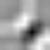

Visualizing conv1 filter 1


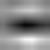

Visualizing conv1 filter 2


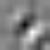

Visualizing conv1 filter 3


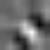

Visualizing conv1 filter 4


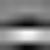

Visualizing conv1 filter 5


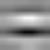

Visualizing conv1 filter 6


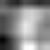

Visualizing conv1 filter 7


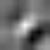

Visualizing conv1 filter 8


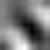

Visualizing conv1 filter 9


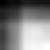

Visualizing conv1 filter 10


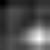

Visualizing conv1 filter 11


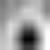

Visualizing conv1 filter 12


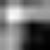

Visualizing conv1 filter 13


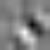

Visualizing conv1 filter 14


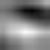

Visualizing conv1 filter 15


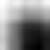

Visualizing conv1 filter 16


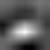

Visualizing conv1 filter 17


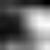

Visualizing conv1 filter 18


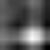

Visualizing conv1 filter 19


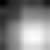

Visualizing conv1 filter 20


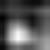

Visualizing conv1 filter 21


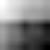

Visualizing conv1 filter 22


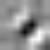

Visualizing conv1 filter 23


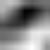

Visualizing conv1 filter 24


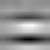

Visualizing conv1 filter 25


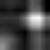

Visualizing conv1 filter 26


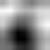

Visualizing conv1 filter 27


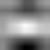

Visualizing conv1 filter 28


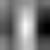

Visualizing conv1 filter 29


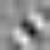

In [0]:
for i in range(30):
  print('Visualizing conv1 filter',i)
  showarray(visualize_filters(resnet.conv1.weight.data[i,0,:,:],50))


## Exercise: Visualize filters for another convolutional layer in ResNet

In [0]:
for i in range(30):
  print('Visualizing conv1 filter',i)
  showarray(visualize_filters(resnet.layer1.conv1.weight.data[i,0,:,:],50))


# Predicting classes with a pre-trained model


To make the process easier to read, we will load the label <--> index assignament for the Places dataset. 

In [0]:
# Load labels
from urllib.request import urlopen

synset_url = 'http://gandissect.csail.mit.edu/models/categories_places365.txt'
classlabels = [r.split(' ')[0][3:] for r in urlopen(synset_url).read().decode('utf-8').split('\n')]


We will load one image to use through the tutorial. 

--2019-07-31 20:16:09--  http://falandodobrasil.com.br/wp-content/uploads/2013/12/rio_de_janeiro-e1387286573487.jpg
Resolving falandodobrasil.com.br (falandodobrasil.com.br)... 168.0.134.200
Connecting to falandodobrasil.com.br (falandodobrasil.com.br)|168.0.134.200|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182558 (178K) [image/jpeg]
Saving to: ‘rio_de_janeiro-e1387286573487.jpg.3’

rio_de_janeiro-e138 100%[===================>] 178.28K   224KB/s    in 0.8s    

2019-07-31 20:16:10 (224 KB/s) - ‘rio_de_janeiro-e1387286573487.jpg.3’ saved [182558/182558]



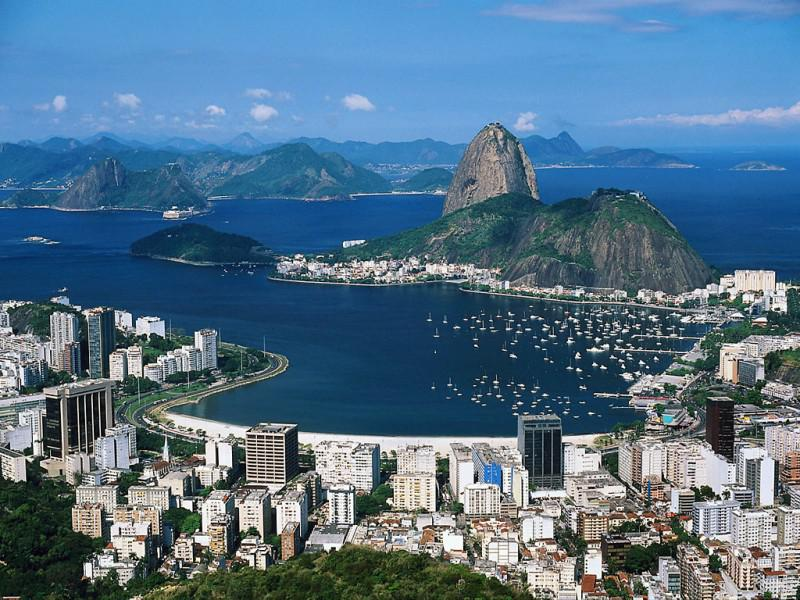

In [0]:
from torchvision import transforms


!wget http://falandodobrasil.com.br/wp-content/uploads/2013/12/rio_de_janeiro-e1387286573487.jpg
img0 = PIL.Image.open('rio_de_janeiro-e1387286573487.jpg').convert('RGB')
  
img_numpy = np.array(img0)


showarray(img_numpy)

First, let's take a look at the raw prediction of the model.

You can find the ImageNet classes here: https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a

In [0]:
  center_crop = transforms.Compose([
         transforms.Resize((227,227)),
         transforms.ToTensor(),
         transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
  ])
  
  im = center_crop(img0)
  out = resnet(im.unsqueeze(0)).squeeze()
  print(out.size())
  categories = out.topk(5)[1]

  print(categories)
  print(classlabels[categories[0]])
  print(classlabels[categories[1]])
  print(classlabels[categories[2]])
  print(classlabels[categories[3]])
  print(classlabels[categories[4]])



torch.Size([365])
tensor([348, 194,  49,  97, 171])
village
islet
beach_house
coast
harbor


# Visualizing Internal Activations of the Network

We visualize the activations of the internal units in the model. We will chop the model and visualize the activations into different locations.

In [0]:
def generate_featuremap_unit(resnet,unit_id,im_input):
    #Extract activation from model
    model_cut  = nn.Sequential(*list(resnet.children())[:-2])
    model_cut.eval()
    #print(model_cut)
    im = center_crop(im_input)
    model_cut.eval()
    out = model_cut(im.unsqueeze(0))
    out_final = out.squeeze()[unit_id]
    return out_final
    

    

In [0]:
def visualize_featuremap(im_input,feature_map,alpha=0.3):
    feature_map = feature_map/(feature_map.max()+1e-10)
    feat_numpy = feature_map.detach().numpy()
    feat_numpy = cv2.resize(feat_numpy,(im_input.shape[1],im_input.shape[0]))
    map_t = 1-feat_numpy
    feat_numpy = np.expand_dims(feat_numpy, axis=2)
    
    map_t = 255*map_t
    map_t = map_t.astype(np.uint8)
    map_t = cv2.applyColorMap(map_t, cv2.COLORMAP_JET)
    im_final = np.multiply((alpha*im_input + (1-alpha)*map_t), feat_numpy) + np.multiply(im_input, 1-feat_numpy)

    #Combine heatmap and image to visualize the features

    return im_final


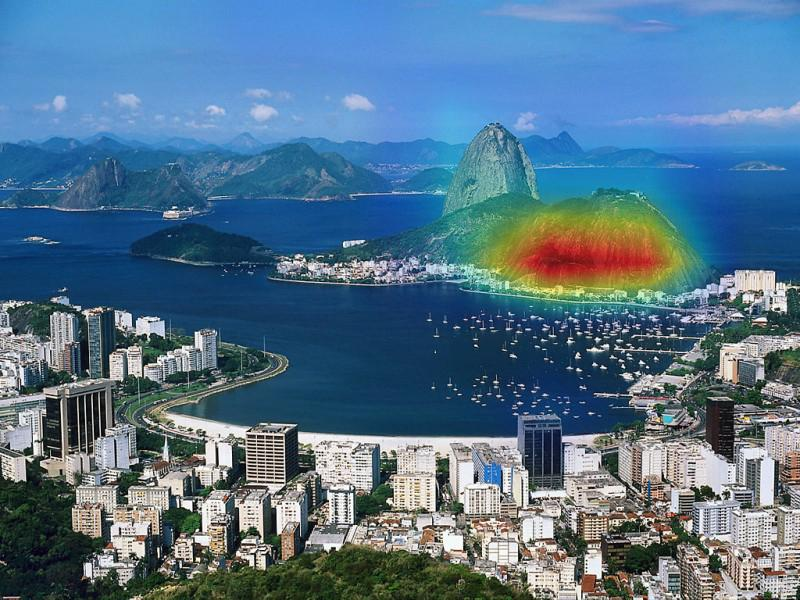

In [0]:
feat = generate_featuremap_unit(resnet,300,img0)
im_final = visualize_featuremap(img_numpy,feat)
showarray(im_final)

Exercise: Find other units that detect other relevant concepts in the image. 


In [0]:
#TODO: Find different units 

# Visualizing model activations wit Class Activation Models

Once we have load the image and the model, now we will explore how to visualize the internal activations of the model. We will start by visualizing which parts of the image are responsibe for the final decision. 

![texto alternativo](https://camo.githubusercontent.com/fb9a2d0813e5d530f49fa074c378cf83959346f7/687474703a2f2f636e6e6c6f63616c697a6174696f6e2e637361696c2e6d69742e6564752f6672616d65776f726b2e6a7067)



We create a version of the model without the last two layers, so that we can access the last convolutional layer.

In [0]:
model = nn.Sequential(*list(resnet.children())[:-2])
model.eval()

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (1

We compute the activations using the Class Activation Mapping for a given output label. 

In [0]:
def generate_featuremap_CAM(model,unit_id,im_input):
    #Extract activation from model
    
    im = center_crop(im_input)
    model.eval()
    out = model(im.unsqueeze(0)) #1 x 2048 x h x w
    w = out.size(3)
    h = out.size(2)
    b = out.size(0)
    c = out.size(1)
    # fc input: N x 2048
    
    out = out.view(out.size(0),out.size(1),w*h).transpose(1,2)
    out = out.view(out.size(0)*h*w,-1) #B*H*W x 2048
    #Run the layer from resnet to compute the weighted average
    out_final = resnet.fc(out)
    
    
    out_final = out_final.view(b,h*w,-1).transpose(1,2).view(b,-1,h,w)
    out_final = out_final.squeeze()[unit_id]
    return out_final
    

    


We can visualize the most activated region in the image for the 5 main top classes. 

Visualizing category village


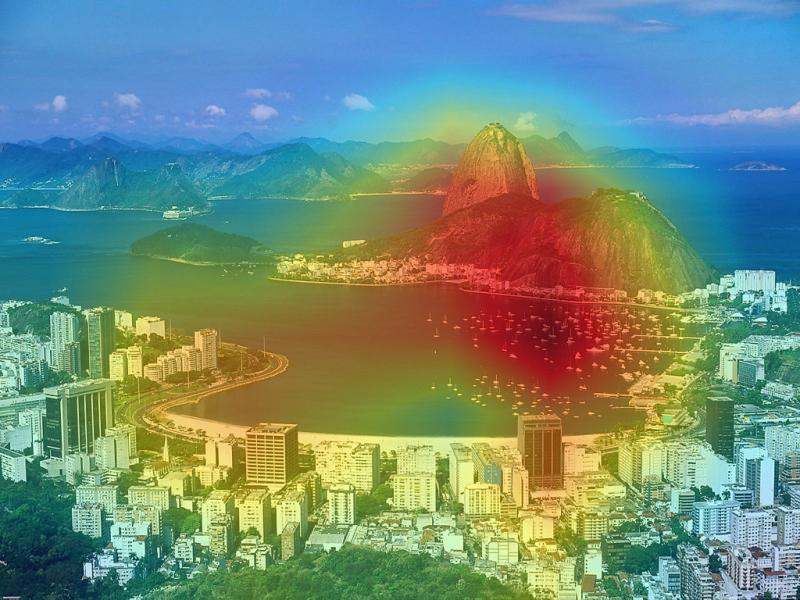

Visualizing category islet


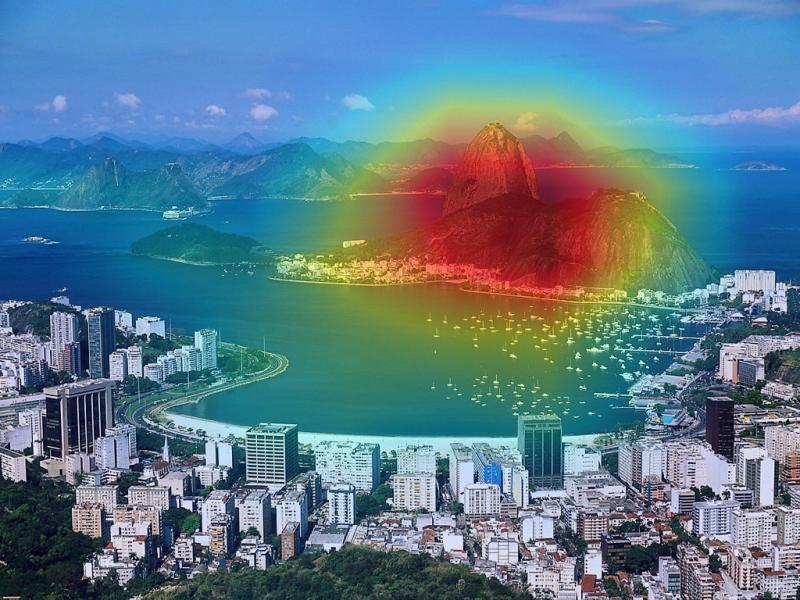

Visualizing category beach_house


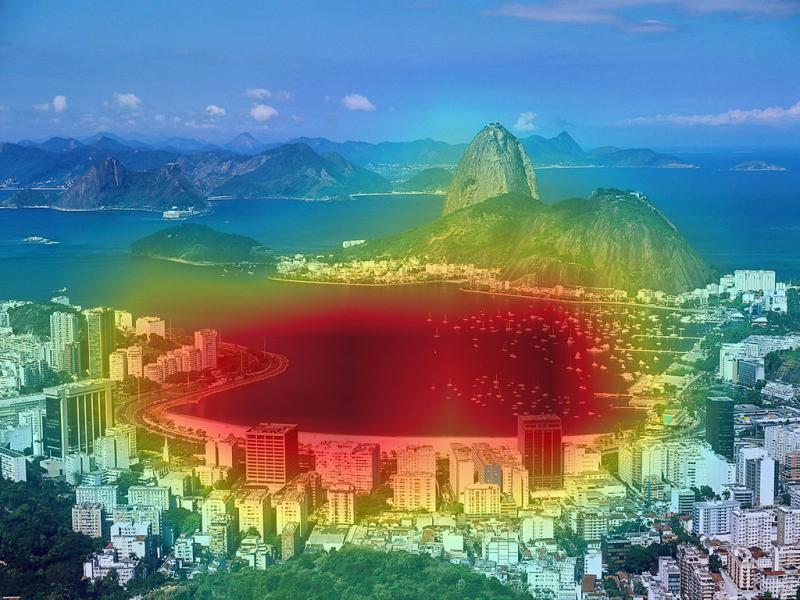

Visualizing category coast


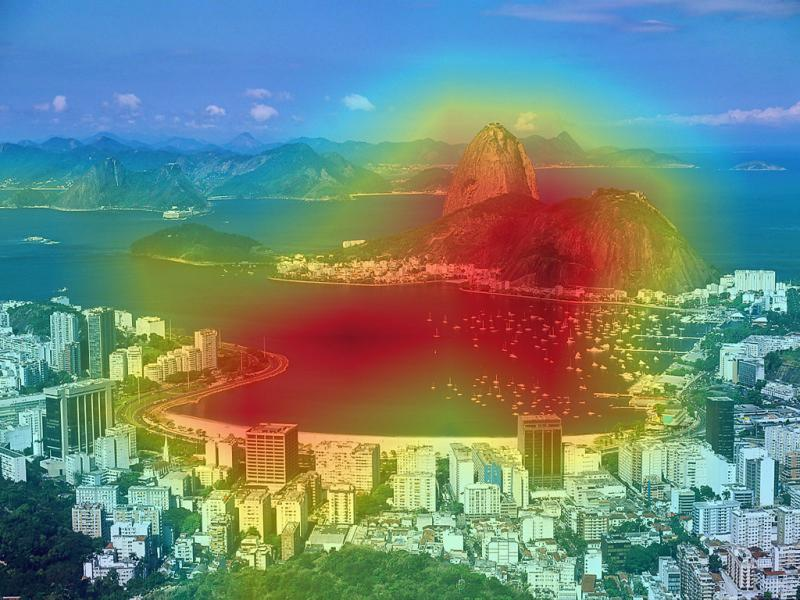

Visualizing category harbor


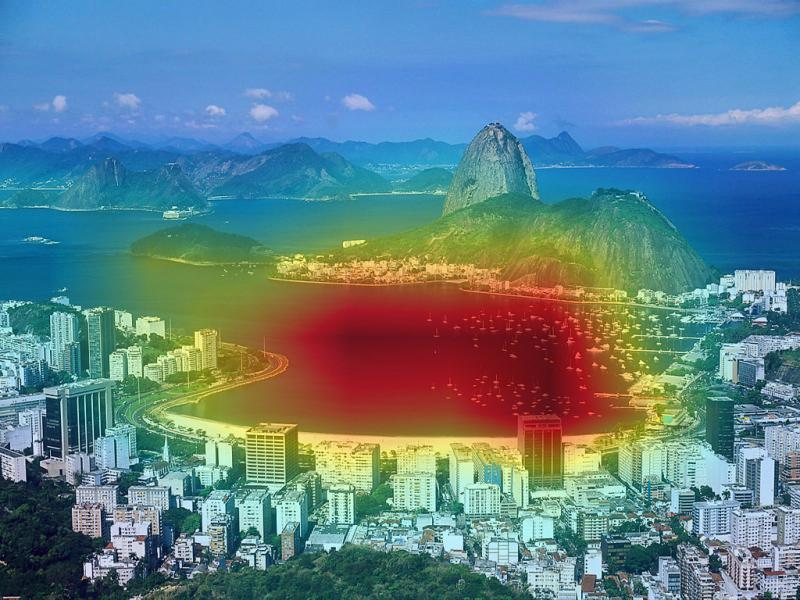

In [0]:
for i in range(categories.shape[0]):
  print('Visualizing category',classlabels[categories[i]])
  feat = generate_featuremap_CAM(model, categories[i].item(),img0)
  im_result = visualize_featuremap(img_numpy,feat)
  showarray(im_result)


#Visualizing generative models

Installing NetDissect and GAN-related libraries

In [0]:
import torchvision
import torch.hub


In [0]:
!git clone https://github.com/CSAILVision/gandissect.git


fatal: destination path 'gandissect' already exists and is not an empty directory.


In [0]:
cd /content/gandissect

/content/gandissect


In [0]:
ls

client/       models/                       resnet50_places365.pth.tar.3
client_dist/  netdissect/                   rio_de_janeiro-e1387286573487.jpg
dataset/      notebooks/                    rio_de_janeiro-e1387286573487.jpg.1
dissect/      README.md                     rio_de_janeiro-e1387286573487.jpg.2
doc/          resnet50_places365.pth.tar    rio_de_janeiro-e1387286573487.jpg.3
gandissect/   resnet50_places365.pth.tar.1  script/
LICENSE       resnet50_places365.pth.tar.2  setup.py


In [0]:
ls

client/       gandissect/  README.md
client_dist/  LICENSE      resnet50_places365.pth.tar
dataset/      models/      rio_de_janeiro-e1387286573487.jpg
dissect/      netdissect/  script/
doc/          notebooks/   setup.py


In [0]:
!script/make_dirs.sh      # Create a conda environment with dependencies


In [0]:
!pip install -v .      # Link the local netdissect package into the env


Created temporary directory: /tmp/pip-ephem-wheel-cache-gr5qij5n
Created temporary directory: /tmp/pip-req-tracker-tkx_nb9g
Created requirements tracker '/tmp/pip-req-tracker-tkx_nb9g'
Created temporary directory: /tmp/pip-install-ijau_jbh
Processing /content/gandissect
  Created temporary directory: /tmp/pip-req-build-5ldoe9xt
  Added file:///content/gandissect to build tracker '/tmp/pip-req-tracker-tkx_nb9g'
    Running setup.py (path:/tmp/pip-req-build-5ldoe9xt/setup.py) egg_info for package from file:///content/gandissect
    Running command python setup.py egg_info
    running egg_info
    creating pip-egg-info/netdissect.egg-info
    writing pip-egg-info/netdissect.egg-info/PKG-INFO
    writing dependency_links to pip-egg-info/netdissect.egg-info/dependency_links.txt
    writing requirements to pip-egg-info/netdissect.egg-info/requires.txt
    writing top-level names to pip-egg-info/netdissect.egg-info/top_level.txt
    writing manifest file 'pip-egg-info/netdissect.egg-info/SOUR

In [0]:
import netdissect
import torch
import torchvision
import torch.hub
from netdissect import nethook, proggan


##Generating Images with a GAN

First, we load the generative model.

In [0]:
n = 'proggan_churchoutdoor-7e701dd5.pth'
# n = 'proggan_conferenceroom-21e85882.pth'
# n = 'proggan_diningroom-3aa0ab80.pth'
# n = 'proggan_kitchen-67f1e16c.pth'
# n = 'proggan_livingroom-5ef336dd.pth'
# n = 'proggan_restaurant-b8578299.pth'
url = 'http://gandissect.csail.mit.edu/models/' + n
try:
    sd = torch.hub.load_state_dict_from_url(url) # pytorch 1.1
except:
    sd = torch.hub.model_zoo.load_url(url) # pytorch 1.0
    
sizes = proggan.sizes_from_state_dict(sd)
model = proggan.ProgressiveGenerator(sizes=sizes)

model.load_state_dict(sd)


IncompatibleKeys(missing_keys=[], unexpected_keys=[])

Generating input noise samples

In [0]:
from netdissect import zdataset
zds = zdataset.z_dataset_for_model(model, size=30, seed=5555)
len(zds), zds[0][0].shape


(30, torch.Size([512, 1, 1]))

Visualizing the images generated by the GAN

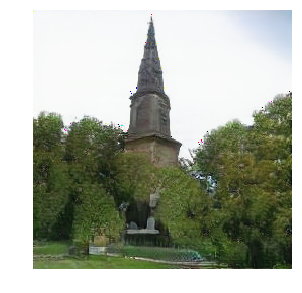

In [0]:
from netdissect import plotutil
idx = 0
# from IPython.display import display
generated_images = model(zds[idx][0].unsqueeze(0))
plotutil.plot_tensor_images(generated_images)

### Generate images using models trained in other scenes

In [0]:
# TO COMPLETE

## Visualizing the internals of GANs

Hooking a model with InstrumentedModel

To analyze what a model is doing inside, we can wrap it with an InstrumentedModel, which makes it easy to hook or modify a particular layer.

InstrumentedModel adds a few useful functions for inspecting a model, including:

* model.retain_layer('layername') - hooks a layer to hold on to its output after computation
* model.retained_layer('layername') - returns the retained data from the last computation
* model.edit_layer('layername', rule=...) - runs the rule function after the given layer
* model.remove_edits() - removes editing rules
Let's setup retain_layer now. We'll pick a layer sort of in the early-middle of the generator. You can pick whatever you like.



In [0]:
from netdissect import nethook

# Don't re-wrap it, if it's already wrapped (e.g., if you press enter twice)
if not isinstance(model, nethook.InstrumentedModel):
    model = nethook.InstrumentedModel(model)
model.retain_layer('layer4')


Now we can inspect internal units of the GAN. 


In [0]:
# Run the model
img = model(zds[0][0][None,...])

# As a side-effect, the model has retained the output of layer4.
acts = model.retained_layer('layer4')

# We can look at it.  How much data is it?
acts.shape


torch.Size([1, 512, 8, 8])

In [0]:
# Let's just look at the 0th convolutional channel.
print(acts[0,0])


tensor([[-0.3780, -0.2439, -0.1824, -0.1798, -0.0635,  0.5947,  0.0497,  1.3406],
        [-0.4630, -0.1521, -0.1447, -0.7038, -0.5338,  0.7345, -0.0789,  1.0032],
        [-0.4260, -0.3278,  0.1741, -0.7402, -0.5182,  1.2732, -0.0845, -0.0208],
        [-0.2540, -0.2801,  0.7733, -0.4419, -0.2017,  1.6757, -0.0564, -0.0325],
        [-0.6896, -0.6121, -0.0525, -0.8923, -0.6397, -0.3707, -0.7826, -0.3145],
        [-1.1871, -1.1210, -0.2864, -1.0593, -1.3274, -1.1936, -1.3434, -0.6379],
        [-0.8832, -0.9165, -0.4149, -0.3597, -0.9975, -1.2343, -1.3093, -0.5713],
        [-0.5132, -1.1210, -1.1503, -0.7243, -0.9133, -1.1067, -1.3048, -0.6174]])


Visualizing activation data
It can be informative to visualize activation data instead of just looking at the numbers.

Net dissection comes with an ImageVisualizer object for visualizing grid data as an image in a few different ways. Here is a heatmap of the array above:



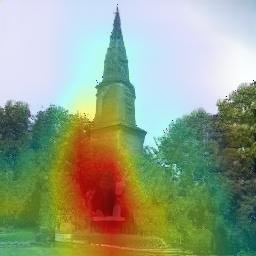

In [0]:
data = ((generated_images + 1) / 2 * 255).permute(0, 2, 3, 1).byte().cpu().numpy()
im_final = visualize_featuremap(data[0],acts[0,3])
showarray(im_final)

# Editing a model by altering units

Now let's try changing some units directly to see what they do.

We we will use model.edit_layer to do that.

This works by just allowing you to define a function that edits the output of a layer.

We will edit the output of layer4 by zeroing ten of the tree units.



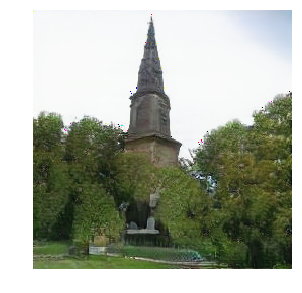

In [0]:
model.edit_layer('layer4',ablation=0)
img = model(zds[0][0][None,...])

plotutil.plot_tensor_images(img)


We can now ablate particular units. For the reference, you can find what is every unit responsible of in here:
http://wednesday.csail.mit.edu/davidbau/gandissect/dissect/churchoutdoor/dissect.html


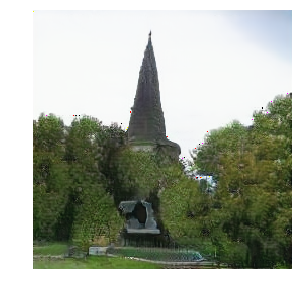

In [0]:
ablation_tensor = torch.zeros(512,8,8)

grass_units = [14,149,125,380,159,209,511,387,153,503,75,335,207,274,2,156,485,190,97,15,340,13,20,315,128,107,174,283,117,169,103,399]
tower_units = [349,184,363,309,370,493,428,511,427,378,276,52,289,305,18,505,188,161,500,10,226,446,244,252,46,247,329,208,160,4,128]

ablation_tensor[tower_units,:,:] = 1


model.edit_layer('layer4',ablation=ablation_tensor)
img = model(zds[0][0][None,...])

plotutil.plot_tensor_images(img)
